# Documentation of Machine Learning Code

Projects Tasks: 
For part c (option 1), you were provided an Exploratory Data Analysis (“EDA”) code that is used to prepare the data/analysis for building models (“Project Part c Machine Learning EDA.ipynb”). Your task is to document the code clearly, including both high level what the code do as well as provide enough details about the code itself. The final goal of the document is aimed to help a Python beginner, who has no or little previous python/coding experience, to understand the logistic regression model code. Do assume the personnel have logistic regression model and other modeling experience, and the help he/she needs from you is purely on the Python code side.


# US Income - Logistic Regression Model Data Preparation

Source: https://www.kaggle.com/kost13/us-income-logistic-regression

Ian Bailey

#### Some author's notes (the information here may help your documentation)
This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html

Split into train-test (2/3, 1/3 random).
48842 instances, mix of continuous and discrete    (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

  
Prediction task is to determine whether a person makes over 50K a year.

  


Description of fnlwgt (final weight)

The weights on the CPS files are controlled to independent estimates of the
civilian noninstitutional population of the US.  These are prepared monthly
for us by Population Division here at the Census Bureau.  We use 3 sets of
controls. These are:
      1.  A single cell estimate of the population 16+ for each state.
      2.  Controls for Hispanic Origin by age and sex.
      3.  Controls by Race, age and sex.
  
We use all three sets of controls in our weighting program and "rake" through
them 6 times so that by the end we come back to all the controls we used.
  
The term estimate refers to population totals derived from CPS by creating
"weighted tallies" of any specified socio-economic characteristics of the
population.
  
People with similar demographic characteristics should have
similar weights.  There is one important caveat to remember
about this statement.  That is that since the CPS sample is
actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within
state.
  

>50K, <=50K.
  
age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  

## Code Starts Here

In [54]:
#importing all needed Python libraries.
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [55]:
#setting column names
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

#importing data from csv files and setting them equal to varible names. 
train = pd.read_csv('adult-training.csv', names=columns)
test = pd.read_csv('adult-test.csv', names=columns, skiprows=1)

#%matplotlib inline sets the backend of matplotlib to the ‘inline‘ backend. Hence when you execute matplotlib 
#plotting commands the output will be displayed inline within Jupyter Notebook directly below the code cell where 
#you had entered the command.
%matplotlib inline

In [56]:
len(train) #displays the length of the dataset

32561

In [57]:
train.head() #displaying the first five rows of the dataset

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
train.info() #displaying info about the data set, i.e (Range Index, Dtype, Col Names and Tot # of cols).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [59]:
test.info() #repeating the .info method to display info for test dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   fnlgwt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education num   16281 non-null  int64 
 5   Marital Status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital Gain    16281 non-null  int64 
 11  Capital Loss    16281 non-null  int64 
 12  Hours/Week      16281 non-null  int64 
 13  Native country  16281 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


### Cleaning data
Some cells contain ' ?', we convert them to NaN

In [60]:
#using the replace funtion to replace all '?' with special values defined in numpy. Nan are used as a 
#mask (if you don’t care what the original value was) basically changing the value to 0.
train.replace(' ?', np.nan, inplace=True)  
test.replace(' ?', np.nan, inplace=True)

In [61]:
#.insull()checks for any missing values in the dataframe as whole.
# When you use sum(), it will return the sum of every column, 
#which adds trues(=1) and false(= 0) together.
train.isnull().sum()  

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [62]:
test.isnull().sum() #repeating above method on test dataset. 

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64

As we see only Workclass, Occupation and Native country features have missing values.

## Features engineering

### Income

Simply change Income into 0's and 1's

In [63]:
#using apply method to create new train['Income'] and test['Income'] columns
#where income is either above or below 50K and represented by a 0 or 1. 1 meaning its over, 0 meaning its below.
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

### Age

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

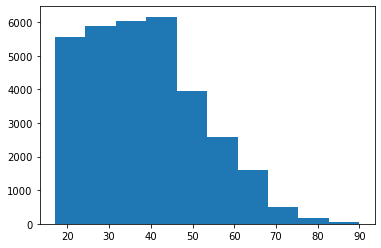

In [64]:
plt.hist(train['Age']) #plotting histogram from dataset 'train' plotting col 'Age' data.

Age looks skewed, it needs to be normalized. It'll be done later with sklearn.preprocessing.StandardScaler().

### Workclass
There are many empty rows, let's replace them with 0 and check how data plot looks like.

In [65]:
#is used to replace NULL/None values on all or selected multiple DataFrame columns with either zero(0), 
#empty string, space, or any constant literal values.
train['Workclass'].fillna(' 0', inplace=True) 
test['Workclass'].fillna(' 0', inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' 0'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

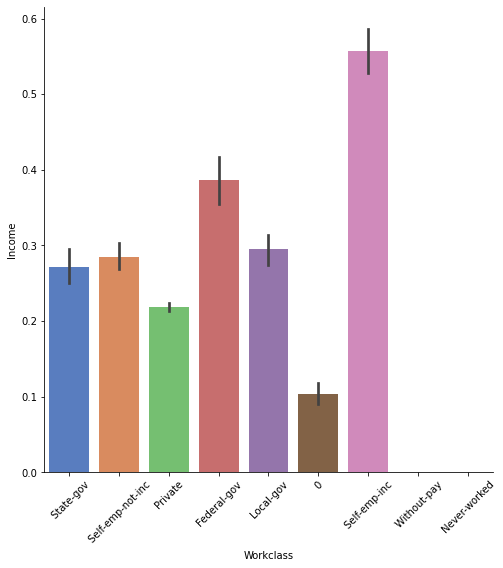

In [66]:
# using the seaborn package, plotting categorical plots. x axis is the workclass col, y is income col, data is pulled from dataset 
#train to plot the cat graph. 
sns.catplot(x="Workclass",y="Income",data=train,kind="bar", height = 7, palette = "muted")
plt.xticks(rotation=45)

In [67]:
#The value_counts() method in Pandas returns the series containing counts of unique values. The resulting object will 
#be in descending order so that the first element is the most frequently-occurring element. 
#It excludes NA values by default.
train['Workclass'].value_counts() 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

As Never-worked and Without-pay look very similar, we merge them.

In [68]:
# replacing Workplace col data 'Without-pay' with 'Never-worked'. All instances of without-pay will now be never-worked.
train['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

### fnlgwt

In [69]:
train['fnlgwt'].describe() #descibe the data of train col 'fnlgwt'

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

Fnlgwt feature has high numers and big sandard deviation, let's take logarithm of that.

In [70]:
#applying log method to 'fnlgwt' to decrease its count. 
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))

In [71]:
train['fnlgwt'].describe() #the count is now log of the previous count for each of desribes() values. 

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

### Education

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

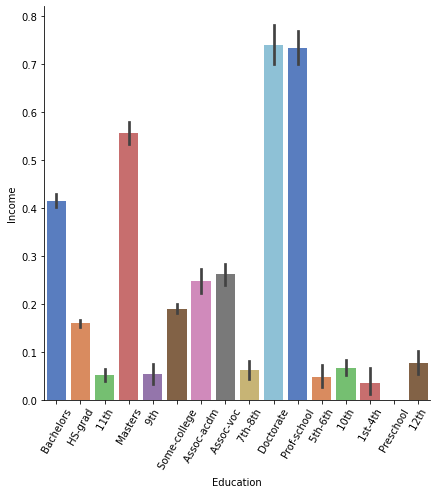

In [72]:
# using the seaborn package, plotting categorical plots. x axis is the Education col, y is income col, data is pulled from dataset 
#train to plot the cat graph. 
sns.catplot(x="Education",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60)

Primary education is devided into grades, they all give almost the same result. We can merge them into one feature - Primary.

In [73]:
#creating function 'primary', if in statement thats saying if x is in list given, return 'Primary' as the value of X, else return X. 
#Meaning not Primary but else. 
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [74]:
#applying 'Primary' function to 'Education' of both datasets, and creating a new 'Education' cols. This represents the 
#outcome of using the .apply method to apply the function'Primary' to the cols "Education' from each dataset.
#The new cols of 'Education' will contain data that'll contain 'Primary' or x
train['Education'] = train['Education'].apply(primary)
test['Education'] = test['Education'].apply(primary)

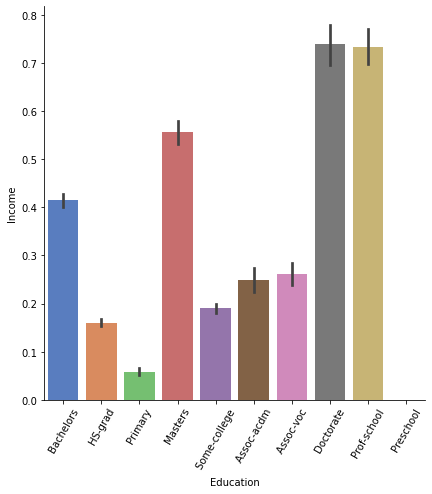

In [75]:
#plotting cat plot using 'Education Column' for x and 'Income' for y. pulling from dataset train.
sns.catplot(x="Education",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);

### Education num

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

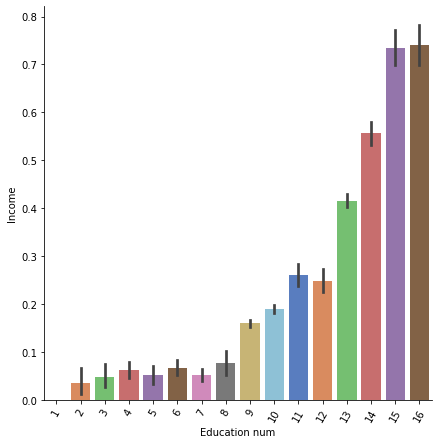

In [76]:
# repeating the same steps as before. Plotting 'Education Num' on x-axis and plotting 'Income' on y axis. Again pulling data 
#from 'train' dataset. The rest of the command line is setting the charactistics of the chart such as 'kind', 'height', and 
#palette. plt.xticks(rotation=60) allows for the x-lable values of education num, to be rotated by 60 from default center aligned. 
sns.catplot(x="Education num",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60)

### Marital Status

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

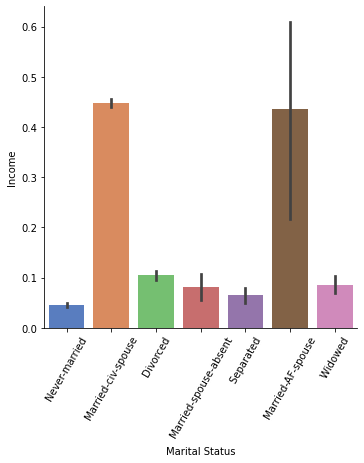

In [77]:
#doing the same thing as seen before just for col 'Marital Status'. 
sns.catplot(x="Marital Status",y="Income",data=train,kind="bar", height = 5, palette = "muted")
plt.xticks(rotation=60)

In [78]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

There are very few Married-AF-spouse features. They are similar to Married-civ-spouse, so we can merge them

In [79]:
#since Married-AF-spouse is so low and similar to Married-civ-spouse, we just use the replace fucntion  to replace Married-AF-spouse
#with Married-civ-spouse. Our count of 14976 will now increase by 23, as that was the count for Married-AF-spouse. We are doing this 
#on both datasets under 'Martial Status' col.
train['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)


In [80]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14999
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
Name: Marital Status, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Widowed')])

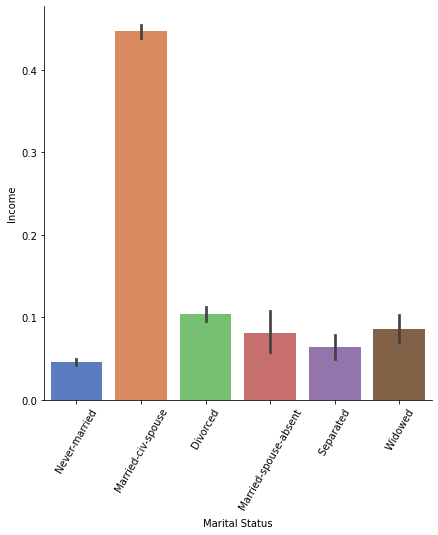

In [81]:
#same code to plot the new 'Marital Status' col from dataset 'train', which contains no Married-AF-spouse instances.  
sns.catplot(x="Marital Status",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60)

### Occupation

In [82]:
#is used to replace NULL/None values on all or selected multiple DataFrame columns with either zero(0), 
#empty string, space, or any constant literal values. 
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' 0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

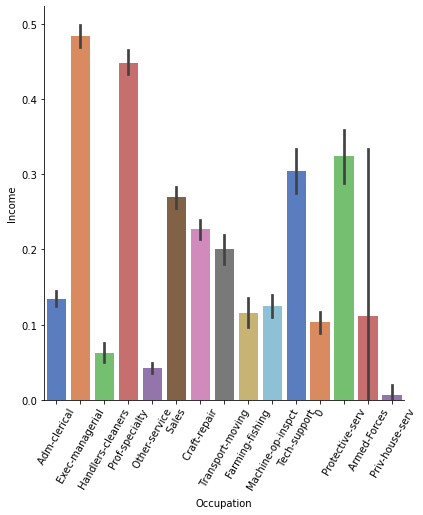

In [83]:
#same code as before to plot Occupation/Income cat graph. 
sns.catplot(x="Occupation",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60)

In [84]:
#looking at the value counts of Occupation col. 
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Everything looks good, except Armed-Forces. They are similar to 0 and that's what we replace them with.

In [86]:
#taking every instance of 'armed forces' and replacing it with zero. 
#Doing this over both datasets 
train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)

In [87]:
#Count of zero now increases from 1843 to 1852.
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: Occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' 0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

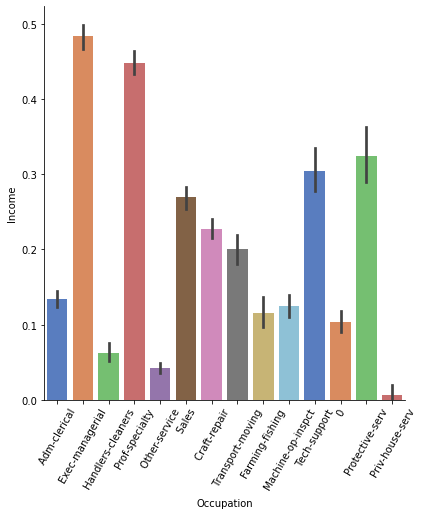

In [32]:
#plotting new Occupation cat plot. As you can see armed forces is no longer an job option, it has been added to 0. 
sns.catplot(x="Occupation",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60)

### Relationship

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Not-in-family'),
  Text(1, 0, ' Husband'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

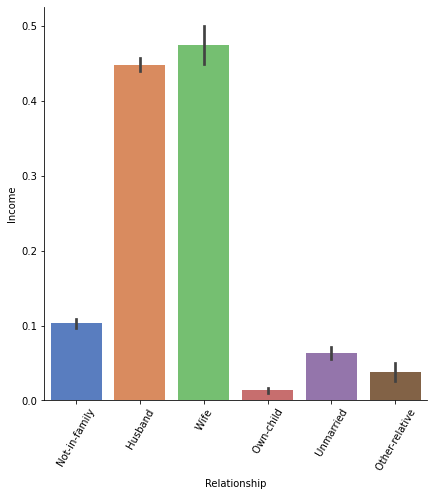

In [33]:
#same code as before to plot Relationship/Income cat graph. 
sns.catplot(x="Relationship",y="Income",data=train,kind="bar", height= 6, palette = "muted")
plt.xticks(rotation=60)

In [34]:
#looking at the value counts of Relationship col. 
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Looks good.

### Race

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

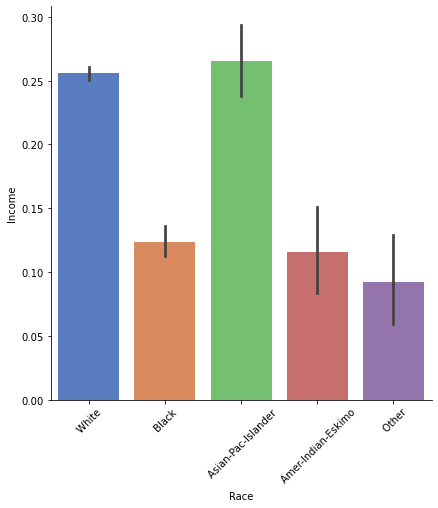

In [35]:
#same code as before to plot Race/Income cat graph. Here rotaion drops as we dont have to rotate Race values as much to fit. 
sns.catplot(x="Race",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=45)

In [36]:
##looking at the value counts of Race col. 
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

### Sex

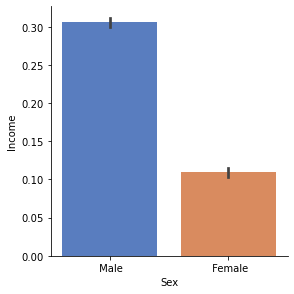

In [37]:
##same code as before to plot Sex/Income cat graph. Here we have no xticks as its not needed. Sex is either male or female, we
#dont have more than two values to plot. 
sns.catplot(x="Sex",y="Income",data=train,kind="bar", height = 4, palette = "muted")

### Capital Gain , Capital Loss, Hours/Week

These features just need to be normalization/standarized.

### Native country

In [38]:
##is used to replace NULL/None values on all or selected multiple DataFrame columns with either zero(0), 
#empty string, space, or any constant literal values. In this case we are replacing all NULL/None values with zero in 
#Native country col.
train['Native country'].fillna(' 0', inplace=True)
test['Native country'].fillna(' 0', inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

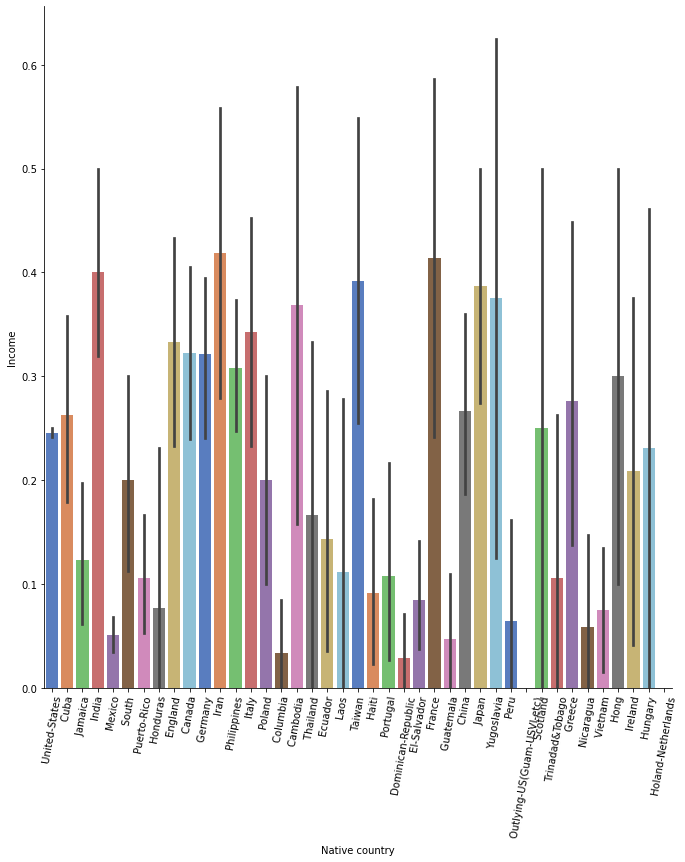

In [93]:
#same code as before to plot Sex/Income cat graph. Here xticks rotation=80 because Native Countrys has a lot of values
#to plot, having the rotation rotated even more than 60 is needed, so that every value can been seen on the graph. Also, 
#having height at 6 is not ideal as you wont be able to read the graph that clearly. Increasing height will add
#some length to it so things are more visible. 
sns.catplot(x="Native country",y="Income",data=train,kind="bar", height = 10, palette = "muted")
plt.xticks(rotation=80)

We need to segregate these countries into a few categories.

In [40]:
#creating function 'native' to help segregate the countries into categories. 
#if country is in United States, Cube, or the value is 0 the function will return US as native value. 
#elif country is in either 'England','Germany','Canada',' Italy', ' France', ' Greece', ' Philippines', which will return 
#native value as 'western'
#same concept remains for the remaining elifs and else in the function.
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country 

In [41]:
#applying 'native' function to 'Native Country' cols of both datasets, and creating a new 'Native Country' cols. This represents the 
#outcome of using the .apply method to apply the function 'native' to the cols 'Native Country' from each dataset.
#The new cols of will contain data by not each individual country, but by grouping each country into respective parts of the world
#which will clean up our data. 
train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)

In [42]:
#new value counts from our new 'Native Country' col. 
train['Native country'].value_counts()

US             29848
Poor            1415
Western          677
Eastern          386
Poland team      235
Name: Native country, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'Poor'),
  Text(2, 0, 'Eastern'),
  Text(3, 0, 'Poland team'),
  Text(4, 0, 'Western')])

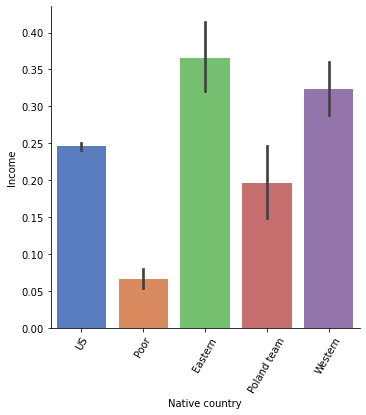

In [43]:
#same code as before to plot 'Native Country'/'Income' cat graph. As you can see our graph is much cleaner and easier to read 
#than before.
sns.catplot(x="Native country",y="Income",data=train,kind="bar", height = 5, palette = "muted")
plt.xticks(rotation=60)

## One-hot encoding

Now we need to encode categorical features, we are going to do it with pd.get_dummies(). As this method may cause some problems, we merge datasets. It ensures that dimensions for both datasets are equal and also that given feature corresponds to the same dimension in both train and test datasets.

In [95]:
#merge datasets
joint = pd.concat([train, test], axis=0)

We need to analize features, find categorical ones and one-hot encode them

In [96]:
#datatypes of the joined datasets(train,test) represented by variable 'joint'
joint.dtypes
joint

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,11.258253,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,11.330348,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,12.281398,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,12.366157,Primary,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,12.732013,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,12.280345,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,0,12.680454,HS-grad,9,Widowed,0,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,12.834639,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,11.337286,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [46]:
#list of columns with dtype: object
categorical_features = joint.select_dtypes(include=['object']).axes[1]

#.nunique counts distinct observations over requested axis. then printing col which is the columns from categorical features 
#with dtype 'object'. then using .nunique counting the instances of each catergorical feature and displayin its result. 
for col in categorical_features:
    print (col, joint[col].nunique())

Workclass 8
Education 10
Marital Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


In [47]:
#one-hot encode
for col in categorical_features:
    #using pd.concat calling the joint dataset. using pd.get_dummies, which converts categorical variable into 
    #dummy/indicator variables, in dataset 'joint'[col], prefix=col parameter is string to append DataFrame column names.  . 
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    #drops col on axis 1. 
    joint.drop(col, axis=1, inplace=True)

In [48]:
joint.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: 0,Workclass: Federal-gov,Workclass: Local-gov,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native country:Eastern,Native country:Poland team,Native country:Poor,Native country:US,Native country:Western
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


We separate train and test datasets.

In [97]:
#getting the head of train/test dataset. shape() method gives us the number of elements in each dimension of an array. 
# and returns a tuple that contains the number of elements in each dimension of an array. .shape[0] is setting the num
train = joint.head(train.shape[0])
test = joint.tail(test.shape[0])

We devide data frame into features and targets. Then standarize features.

In [ ]:
# variable Xtrain is set to train dataset with the column 'Income' being dropped from axis=1.
Xtrain = train.drop('Income', axis=1)
# setting Ttrain equal to train dataset column 'Income'
Ttrain = train['Income']

#dropping col 'Income' from test dataset.
Xtest = test.drop('Income', axis=1)
#setting Ttest equal to test dataset column 'Income'
Ttest = test['Income']

#standarize the data frames. 
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# End of the code